In [40]:
import pandas as pd
import numpy as np
import statistics
from datetime import datetime
import datetime
import random
import itertools
from scipy.stats import norm
#import seaborn as sns
import math
import random
import sklearn
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [44]:
#Lauras path
#data= pd.read_csv(r'C:\Users\moreno.l.5\Procter and Gamble\Idigoras, Anne - Project\Shipments\total shipments.csv')
#Annes path
df= pd.read_csv(r'C:\Users\idigoras.a\OneDrive - Procter and Gamble\05. Trainings&Acces\FODS 3\Project\Shipments\shipments_2022_2023_2024_Fabric_Baby_Hair.csv')

df = df.drop(columns=['Category'])
df= df.rename(columns={'Day Date (Real)': 'Date'})
categories = df['Sub Sector'].unique()
df.head()


,Sub Sector,Shipment MSU Internal,Date
0,HAIR,0.1122,2022-01-03 00:00:00
1,HAIR,0.0346,2022-01-04 00:00:00
2,HAIR,0.0064,2022-01-05 00:00:00
3,HAIR,0.0049,2022-01-07 00:00:00
4,HAIR,0.0028,2022-01-10 00:00:00


In [45]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as the index
df.set_index('Date', inplace=True)

# Create a dictionary specifying aggregation methods for each column
aggregation = {'Sub Sector': 'first', 'Shipment MSU Internal': 'sum'}

# Convert daily data to weekly by resampling and applying aggregation
data = df.resample('W').agg(aggregation)

# Reset index if needed
df = df.reset_index()

print(df)

           Date Sub Sector  Shipment MSU Internal
0    2022-01-03       HAIR                 0.1122
1    2022-01-04       HAIR                 0.0346
2    2022-01-05       HAIR                 0.0064
3    2022-01-07       HAIR                 0.0049
4    2022-01-10       HAIR                 0.0028
...         ...        ...                    ...
4641 2024-05-17       HAIR                 4.8828
4642 2024-05-20       HAIR                -0.0028
4643 2024-05-21       HAIR                 5.0665
4644 2024-05-22       HAIR                 2.2694
4645 2024-05-23       HAIR                 2.0969

[4646 rows x 3 columns]


14:32:30 - cmdstanpy - INFO - Chain [1] start processing
14:32:30 - cmdstanpy - INFO - Chain [1] done processing
14:32:31 - cmdstanpy - INFO - Chain [1] start processing
14:32:31 - cmdstanpy - INFO - Chain [1] done processing
14:32:32 - cmdstanpy - INFO - Chain [1] start processing
14:32:32 - cmdstanpy - INFO - Chain [1] done processing
14:32:33 - cmdstanpy - INFO - Chain [1] start processing
14:32:34 - cmdstanpy - INFO - Chain [1] done processing


                HAIR  BABY    FABRIC  Total
2024-05-31  1.744201   NaN  2.970338    NaN
2024-06-30 -0.003007   NaN  1.152510    NaN
2024-07-31  1.567603   NaN  2.613849    NaN


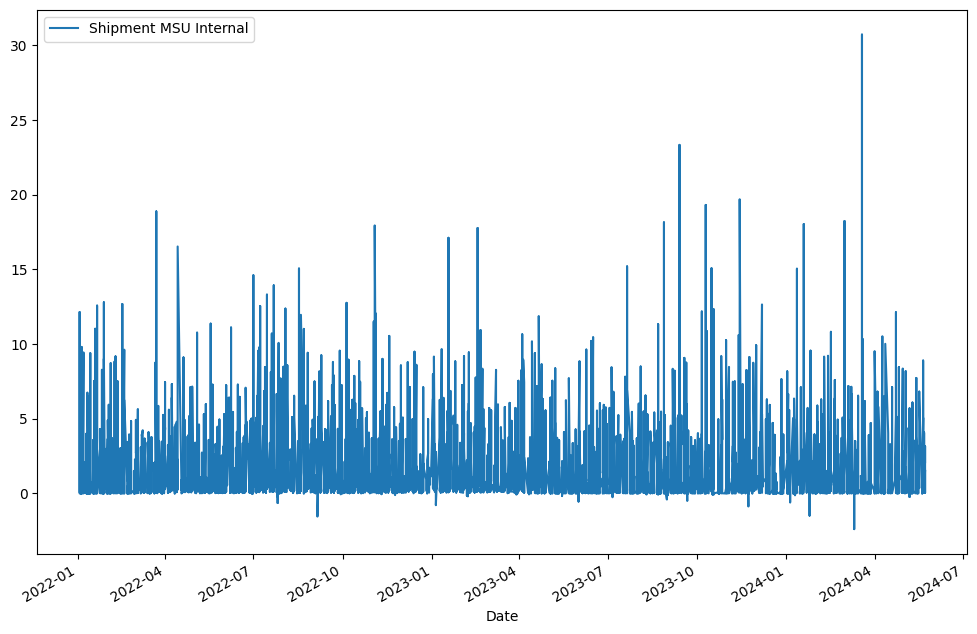

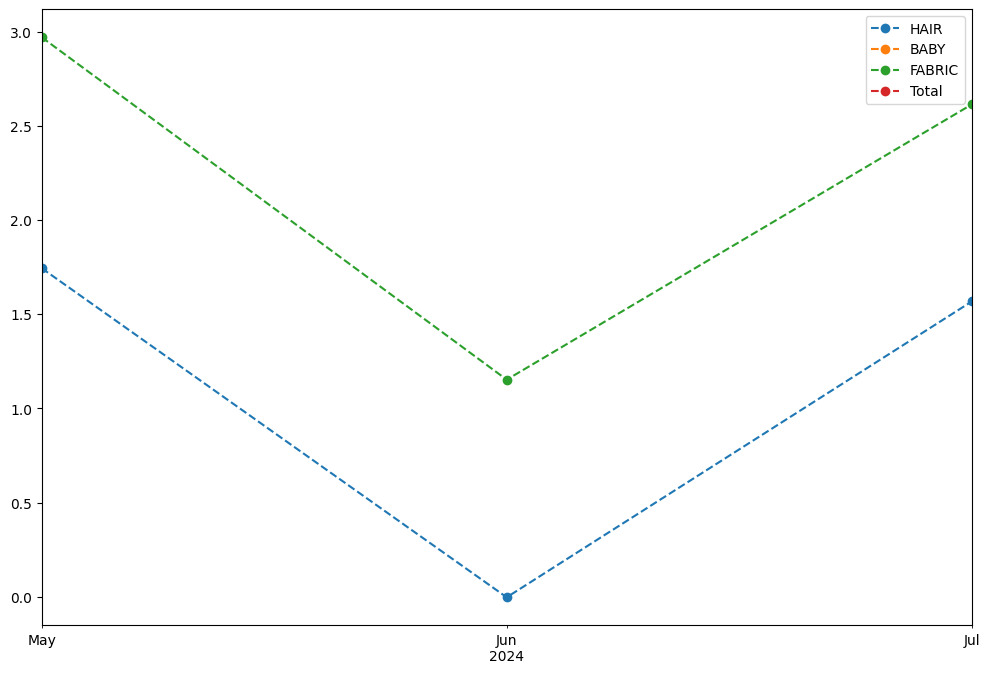

In [47]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Assuming you have loaded your data into a DataFrame named df
# Drop rows with missing values in the 'Date' column
df.dropna(subset=['Date'], inplace=True)

# Define the hierarchy based on unique values in the "Sub Sector" column
hierarchy = {sub_sector: [sub_sector] for sub_sector in df['Sub Sector'].unique()}
hierarchy['Total'] = df['Sub Sector'].unique()

# Prepare the data
y = df.set_index('Date')

# Perform hierarchical time series forecasting
forecast = pd.DataFrame()
for group, subgroups in hierarchy.items():
    group_data = y[y['Sub Sector'].isin(subgroups)].drop(columns=['Sub Sector'])
    group_data = group_data.sum(axis=1).reset_index()
    group_data.columns = ['ds', 'y']
    
    model = Prophet()
    model.fit(group_data)
    
    future = model.make_future_dataframe(periods=3, freq='M')
    group_forecast = model.predict(future)
    
    forecast[group] = group_forecast['yhat'].tail(3)

# Set the index of the forecast DataFrame
last_date = y.index[-1]
forecast.index = pd.date_range(start=last_date, periods=3, freq='M')

print(forecast)

# Plot the historical data
y.plot(figsize=(12, 8))

# Plot the forecasts
forecast.plot(figsize=(12, 8), linestyle='--', marker='o')

plt.show()


